### Data analysis 

In [118]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('data/train.csv') 
test_df = pd.read_csv('data/test.csv')

In [119]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [120]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


From the describe(), some outliers can be identified in some columns. I will keep these columns with outliers in mind to plot and process them in the future.          
Also some data are missing, I will have a look how drastic this is.

In [121]:
columns_with_outliers = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Encode columns different ways.

In [122]:
# Encode
label_encoder = LabelEncoder()
train_df['HomePlanet'] = label_encoder.fit_transform(train_df['HomePlanet'])
train_df['CryoSleep'] = label_encoder.fit_transform(train_df['CryoSleep'])
train_df['VIP'] = label_encoder.fit_transform(train_df['VIP'])
train_df['Destination'] = label_encoder.fit_transform(train_df['Destination'])
train_df['Transported'] = label_encoder.fit_transform(train_df['Transported'])

Look at the most common value, then look at the plots.

In [123]:
train_df['HomePlanet'].value_counts()

HomePlanet
0    4602
1    2131
2    1759
3     201
Name: count, dtype: int64

In [124]:
train_df['CryoSleep'].value_counts()

CryoSleep
0    5439
1    3037
2     217
Name: count, dtype: int64

In [125]:
train_df['VIP'].value_counts()

VIP
0    8291
2     203
1     199
Name: count, dtype: int64

In [126]:
train_df['Destination'].value_counts()

Destination
2    5915
0    1800
1     796
3     182
Name: count, dtype: int64

In [127]:
# Manage missing values for the categorical columns 
train_df['HomePlanet'].replace(3, 1, inplace=True)
train_df['CryoSleep'].replace(2, 0, inplace=True)
train_df['VIP'].replace(2, 0, inplace=True)
train_df['Destination'].replace(3, 2, inplace=True)

In [128]:
# One-hot encode HomePlanet column 
encoded__planets_df = pd.get_dummies(train_df['HomePlanet'], prefix='Planet')
encoded__destination_df = pd.get_dummies(train_df['Destination'], prefix='Destination')
train_df = pd.concat([train_df, encoded__destination_df, encoded__planets_df], axis = 1)

train_df['HomePlanet'].value_counts()

HomePlanet
0    4602
1    2332
2    1759
Name: count, dtype: int64

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_93377/1693088062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HomePlanet', y='Transported', data=transport_rate, palette='viridis')


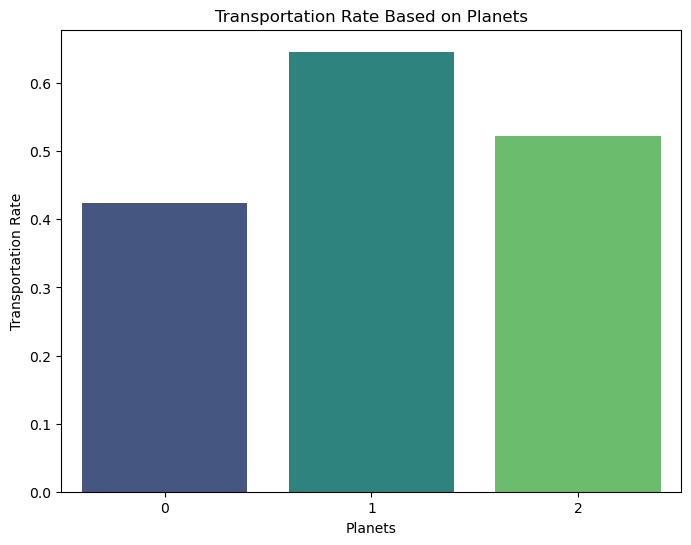

In [129]:
# Calculate the transport rate for each planet
transport_rate = train_df.groupby('HomePlanet')['Transported'].mean().reset_index()

# Plot the bar plot showing transport rate
plt.figure(figsize=(8, 6))
sns.barplot(x='HomePlanet', y='Transported', data=transport_rate, palette='viridis')
plt.title('Transportation Rate Based on Planets')
plt.xlabel('Planets')
plt.ylabel('Transportation Rate')
plt.show()

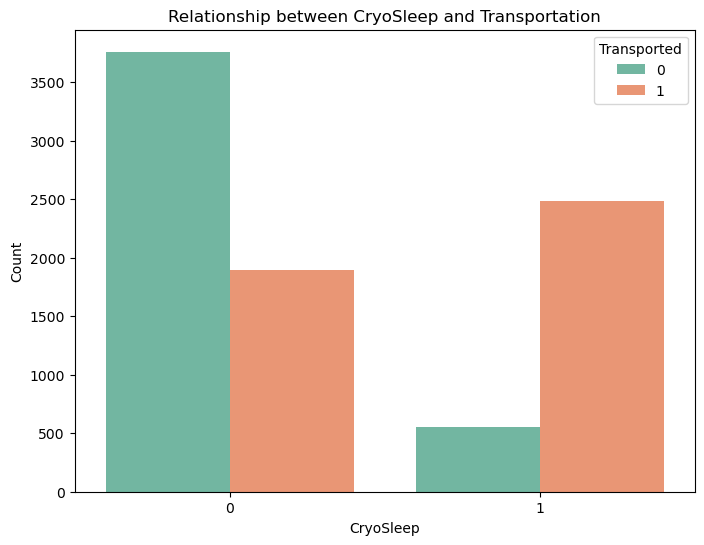

In [130]:
# Plot a count plot to show the relationship between 'CryoSleep' and 'Transported'
plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', hue='Transported', data=train_df, palette='Set2')
plt.title('Relationship between CryoSleep and Transportation')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.show()

Passengers who were elected to be 
put into suspended animation had much worse thansportation rate. 

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_93377/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


<Figure size 2000x1000 with 0 Axes>

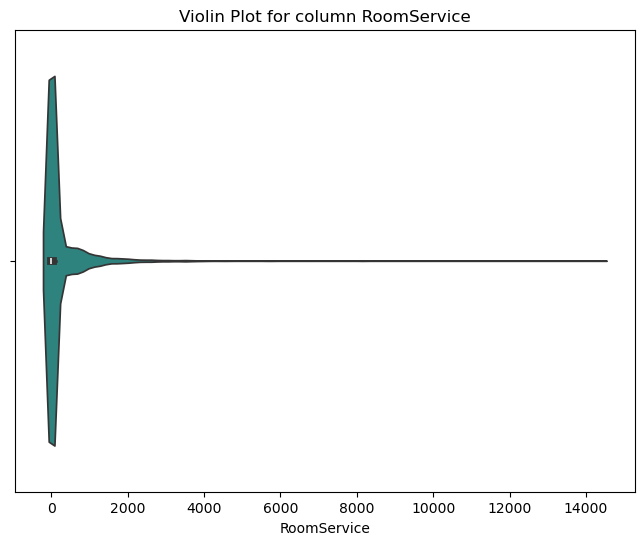

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_93377/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


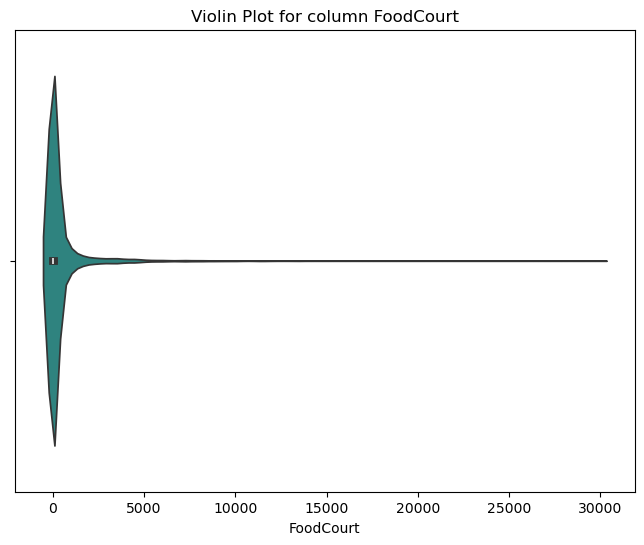

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_93377/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


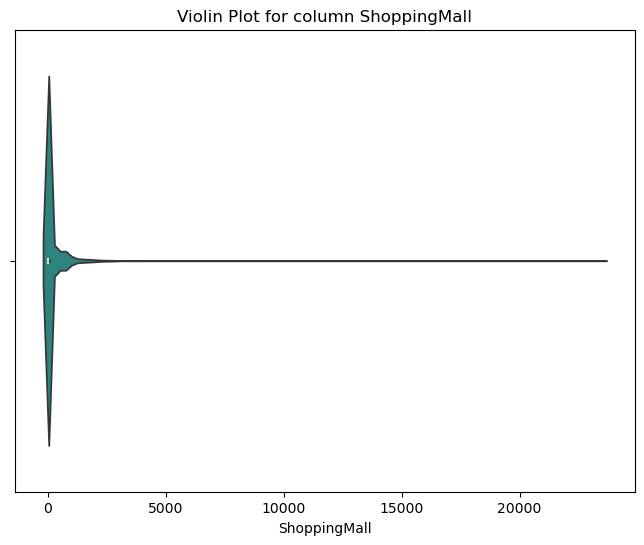

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_93377/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


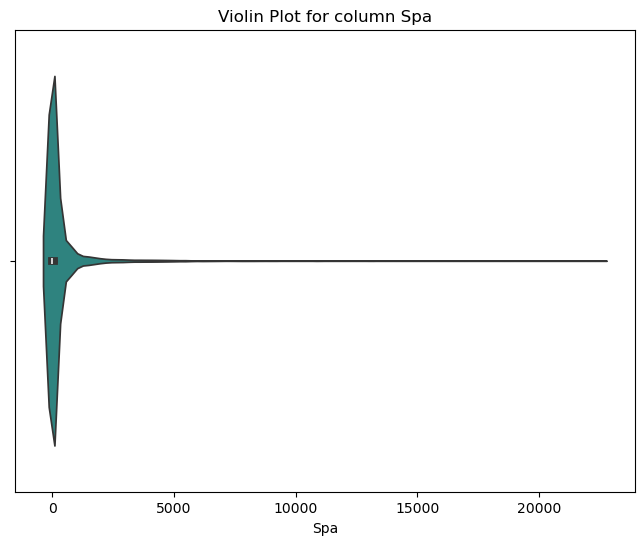

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_93377/3345289150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_df[column], legend=False, palette='viridis')


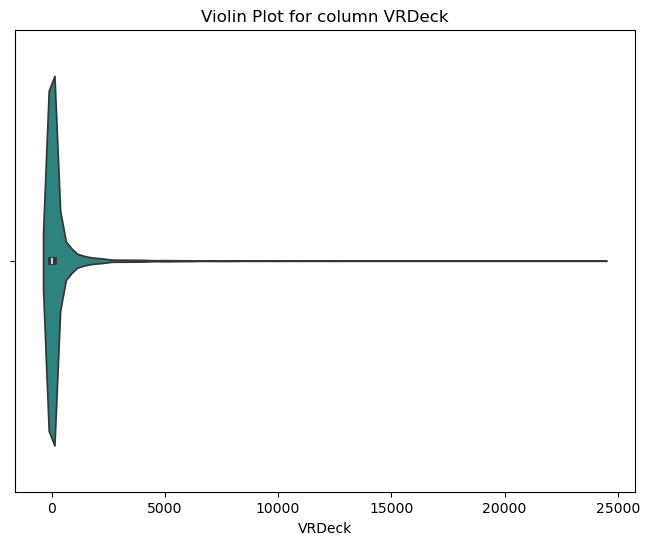

In [131]:
plt.figure(figsize = (20, 10))

for column in columns_with_outliers: 
    # Plot a violin plot to show the distribution 
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=train_df[column], legend=False, palette='viridis')
    plt.title('Violin Plot for column ' + column)
    plt.xlabel(column)
    plt.show()

### Managing outliers 

In [132]:
def manage_outilers(column, outlier_value=1000):
    # Get the mean for non-outlier values to replace 
    mean = train_df[train_df[column] < outlier_value][column].mean()
    # Get the number of outliers 
    print(train_df[train_df[column] < outlier_value][column].count())
    train_df.loc[train_df[column] > outlier_value, column] = mean

manage_outilers('RoomService', 1000)
manage_outilers('FoodCourt', 2500)
manage_outilers('ShoppingMall', 1000)
manage_outilers('Spa', 1500)
manage_outilers('VRDeck', 1500)

7911
8050
8103
8054
8074


### Filling up missing values left accept name and cabin

In [133]:
columns_with_missing = train_df.columns[train_df.isnull().any()].tolist()
columns_with_missing.remove('Name')
columns_with_missing.remove('Cabin')

print(columns_with_missing)
for column in columns_with_missing:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [134]:
train_df.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.672955,0.349362,1.494306,28.827930,0.022892,83.162711,153.001615,82.318459,104.448969,103.711296,0.503624
std,0.790476,0.476796,0.814966,14.339054,0.149568,197.326912,380.482754,199.085206,249.175403,252.135728,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,1000.000000,2492.000000,1000.000000,1497.000000,1495.000000,1.000000


### Have a look at distribution of a column with float data type 

/var/folders/h5/drrwf_210j77_324_tn_rck00000gn/T/ipykernel_93377/1060094205.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['RoomService'], kde = True, fit = scipy.stats.norm)


<Axes: xlabel='RoomService', ylabel='Density'>

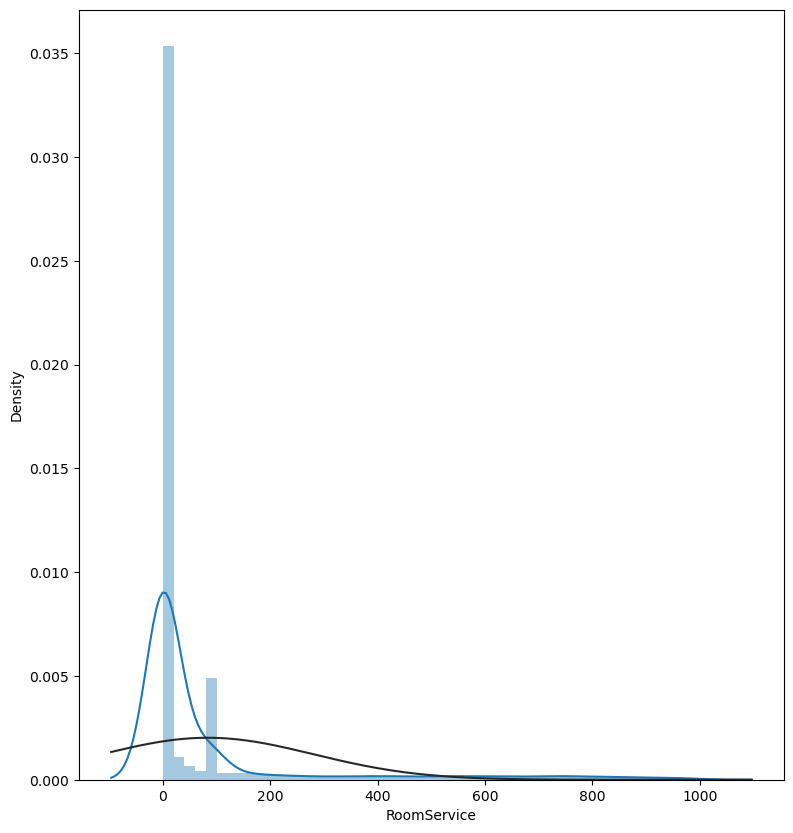

In [135]:
import scipy

plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
sns.distplot(train_df['RoomService'], kde = True, fit = scipy.stats.norm)

# Analyse cabin and name 
First, select the side of the cabin that is P 
for port or S for starboard, and look at the difference between the transport rates for one side and the other. Also it is possible to have a look at deck 

  Side                                            grouped
0    P  [B/0/P, F/0/P, B/1/P, B/1/P, B/1/P, F/1/P, F/2...
1    S  [F/0/S, A/0/S, A/0/S, F/1/S, F/2/S, G/0/S, F/3...
  Deck                                            grouped
0    A  [A/0/S, A/0/S, A/1/S, A/1/S, A/1/S, A/2/S, A/0...
1    B  [B/0/P, B/1/P, B/1/P, B/1/P, B/3/P, B/5/P, B/5...
2    C  [C/2/S, C/0/P, C/3/S, C/4/S, C/5/S, C/6/S, C/3...
3    D  [D/0/P, D/1/S, D/1/P, D/3/P, D/2/S, D/4/P, D/3...
4    E  [E/0/S, E/0/S, E/0/S, E/0/S, E/0/S, E/0/S, E/1...
5    F  [F/0/S, F/1/S, F/0/P, F/2/S, F/3/S, F/1/P, F/2...
6    G  [G/0/S, G/1/S, G/0/P, G/4/S, G/1/P, G/2/P, G/3...
7    T                [T/0/P, T/1/P, T/2/P, T/3/P, T/2/S]


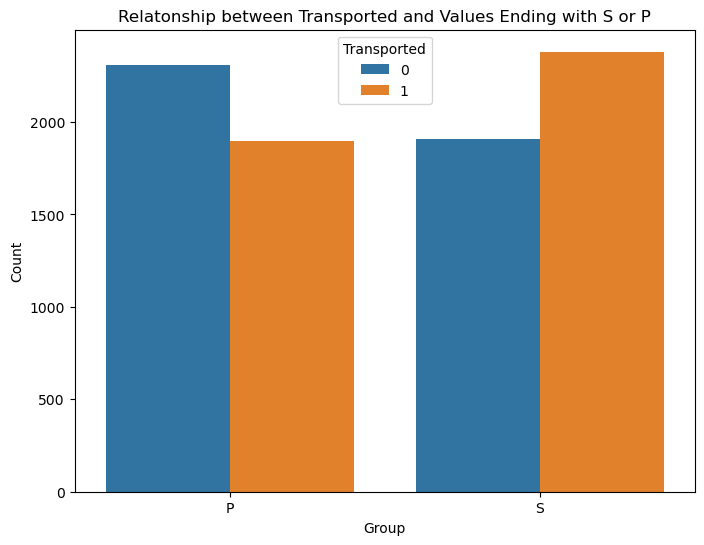

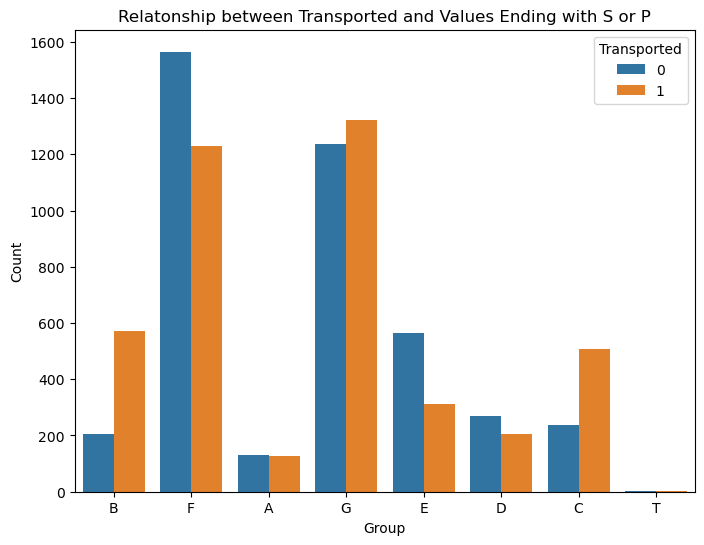

In [138]:
len(train_df['Cabin'].unique())
train_df['Side'] = train_df['Cabin'].str[-1]
train_df['Deck'] = train_df['Cabin'].str[0]
# train_df['Side_Deck'] = train_df['Cabin'].str[0:-1]

# Group by the 'Side' column
grouped_by_side = train_df.groupby('Side')['Cabin'].apply(list).reset_index(name='grouped')

# Group by the 'Deck' column 
grouped_by_deck = train_df.groupby('Deck')['Cabin'].apply(list).reset_index(name='grouped')

print(grouped_by_side)
print(grouped_by_deck)

# Plot the relationship between 'Transported' and Side
plt.figure(figsize=(8, 6))
sns.countplot(x='Side', hue='Transported', data=train_df)
plt.title('Relatonship between Transported and Values Ending with S or P')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

# Plot the relationship between 'Transported' and Deck
plt.figure(figsize=(8, 6))
sns.countplot(x='Deck', hue='Transported', data=train_df)
plt.title('Relatonship between Transported and Values Ending with S or P')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()



In [140]:
len(train_df['Name'].unique())

8474